# MNIST MLP - Multilayer Perceptron / Feedforward Networks

In [39]:
import dill
import theano
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection, metrics, datasets
from neupy import algorithms, layers, environment, plots, storage

In [2]:
# Prepare the data

environment.reproducible()
theano.config.floatX = 'float32'

mnist = datasets.fetch_mldata('MNIST original')

target_scaler = OneHotEncoder()
target = mnist.target.reshape((-1, 1))
target = target_scaler.fit_transform(target).todense()

data = mnist.data / 255.
data = data - data.mean(axis=0)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    data.astype(np.float32),
    target.astype(np.float32),
    train_size=(6 / 7.)
)

In [3]:
# Construct the Networks

network = algorithms.Momentum(
    [
        layers.Input(784),
        layers.Relu(500),
        layers.Relu(300),
        layers.Softmax(10),
    ],

    error='categorical_crossentropy',
    step=0.01,
    verbose=True,
    shuffle_data=True,

    momentum=0.99,
    nesterov=True,
)

# show the network artchitecture
network.architecture()


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 128
[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = categorical_crossentropy
[OPTION] addons = None
[OPTION] momentum = 0.99
[OPTION] nesterov = True

[THEANO] Initializing Theano variables and functions.


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


[THEANO] Initialization finished successfully. It took 31.10 seconds

Network's architecture

-----------------------------------------------
| # | Input shape | Layer Type | Output shape |
-----------------------------------------------
| 1 | 784         | Input      | 784          |
| 2 | 784         | Relu       | 500          |
| 3 | 500         | Relu       | 300          |
| 4 | 300         | Softmax    | 10           |
-----------------------------------------------



In [4]:
# Train the Nets

network.train(x_train, y_train, x_test, y_test, epochs=20)


Start training

[TRAINING DATA] shapes: (60000, 784)
[TEST DATA] shapes: (10000, 784)
[TRAINING] Total epochs: 20

------------------------------------------------
| Epoch # | Train err | Valid err | Time       |
------------------------------------------------
| 1       | 0.2824    | 0.1107    | 8.7 sec    |
| 2       | 0.0671    | 0.08413   | 8.7 sec    |
| 3       | 0.03744   | 0.08223   | 8.7 sec    |
| 4       | 0.02278   | 0.08243   | 8.9 sec    |
| 5       | 0.01462   | 0.08033   | 9.1 sec    |
| 6       | 0.007436  | 0.08088   | 9.1 sec    |
| 7       | 0.004417  | 0.09074   | 9.2 sec    |
| 8       | 0.003041  | 0.08302   | 9.2 sec    |
| 9       | 0.001245  | 0.08705   | 8.8 sec    |
| 10      | 0.0008936 | 0.0865    | 8.8 sec    |
| 11      | 0.0004277 | 0.08655   | 8.9 sec    |
| 12      | 0.0002124 | 0.08701   | 8.9 sec    |
| 13      | 0.0001727 | 0.08781   | 9.0 sec    |
| 14      | 0.0001514 | 0.08831   | 9.3 sec    |
| 15      | 0.0001364 | 0.08879   | 9.0 sec    |
| 

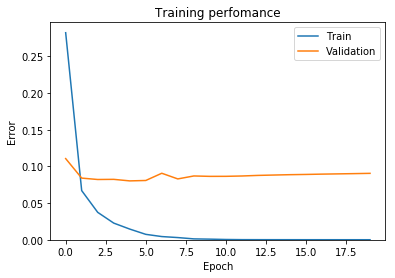

In [5]:
plots.error_plot(network)

In [6]:
# Simple report for the classification result.

y_predicted = network.predict(x_test).argmax(axis=1)
y_test = np.asarray(y_test.argmax(axis=1)).reshape(len(y_test))

print(metrics.classification_report(y_test, y_predicted))
score = metrics.accuracy_score(y_test, y_predicted)
print("Validation accuracy: {:.2%}".format(score))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       936
          1       1.00      0.99      0.99      1163
          2       0.98      0.98      0.98       982
          3       0.98      0.98      0.98      1038
          4       0.98      0.98      0.98       948
          5       0.99      0.97      0.98       921
          6       0.99      1.00      0.99      1013
          7       0.98      0.98      0.98      1029
          8       0.98      0.98      0.98       978
          9       0.98      0.97      0.97       992

avg / total       0.98      0.98      0.98     10000

Validation accuracy: 98.27%


In [7]:
# Save layer and parameters
storage.save(network, 'models/mnist_mlp_neupy.pkl')

In [8]:
# Save algorithms
with open('models/mnist_mlp_neupy.dill','wb') as f:
    dill.dump(network, f)

In [9]:
# To load the layer and parameter:
#storage.load(network, 'models/mnist_mlp_neupy.pkl')

# To load the algorithms:
#with open('models/mnist_mlp_neupy.dill', 'rb') as f:
#   network = dill.load(f)


1. Input(784)
   No Weight
2. Relu(500)


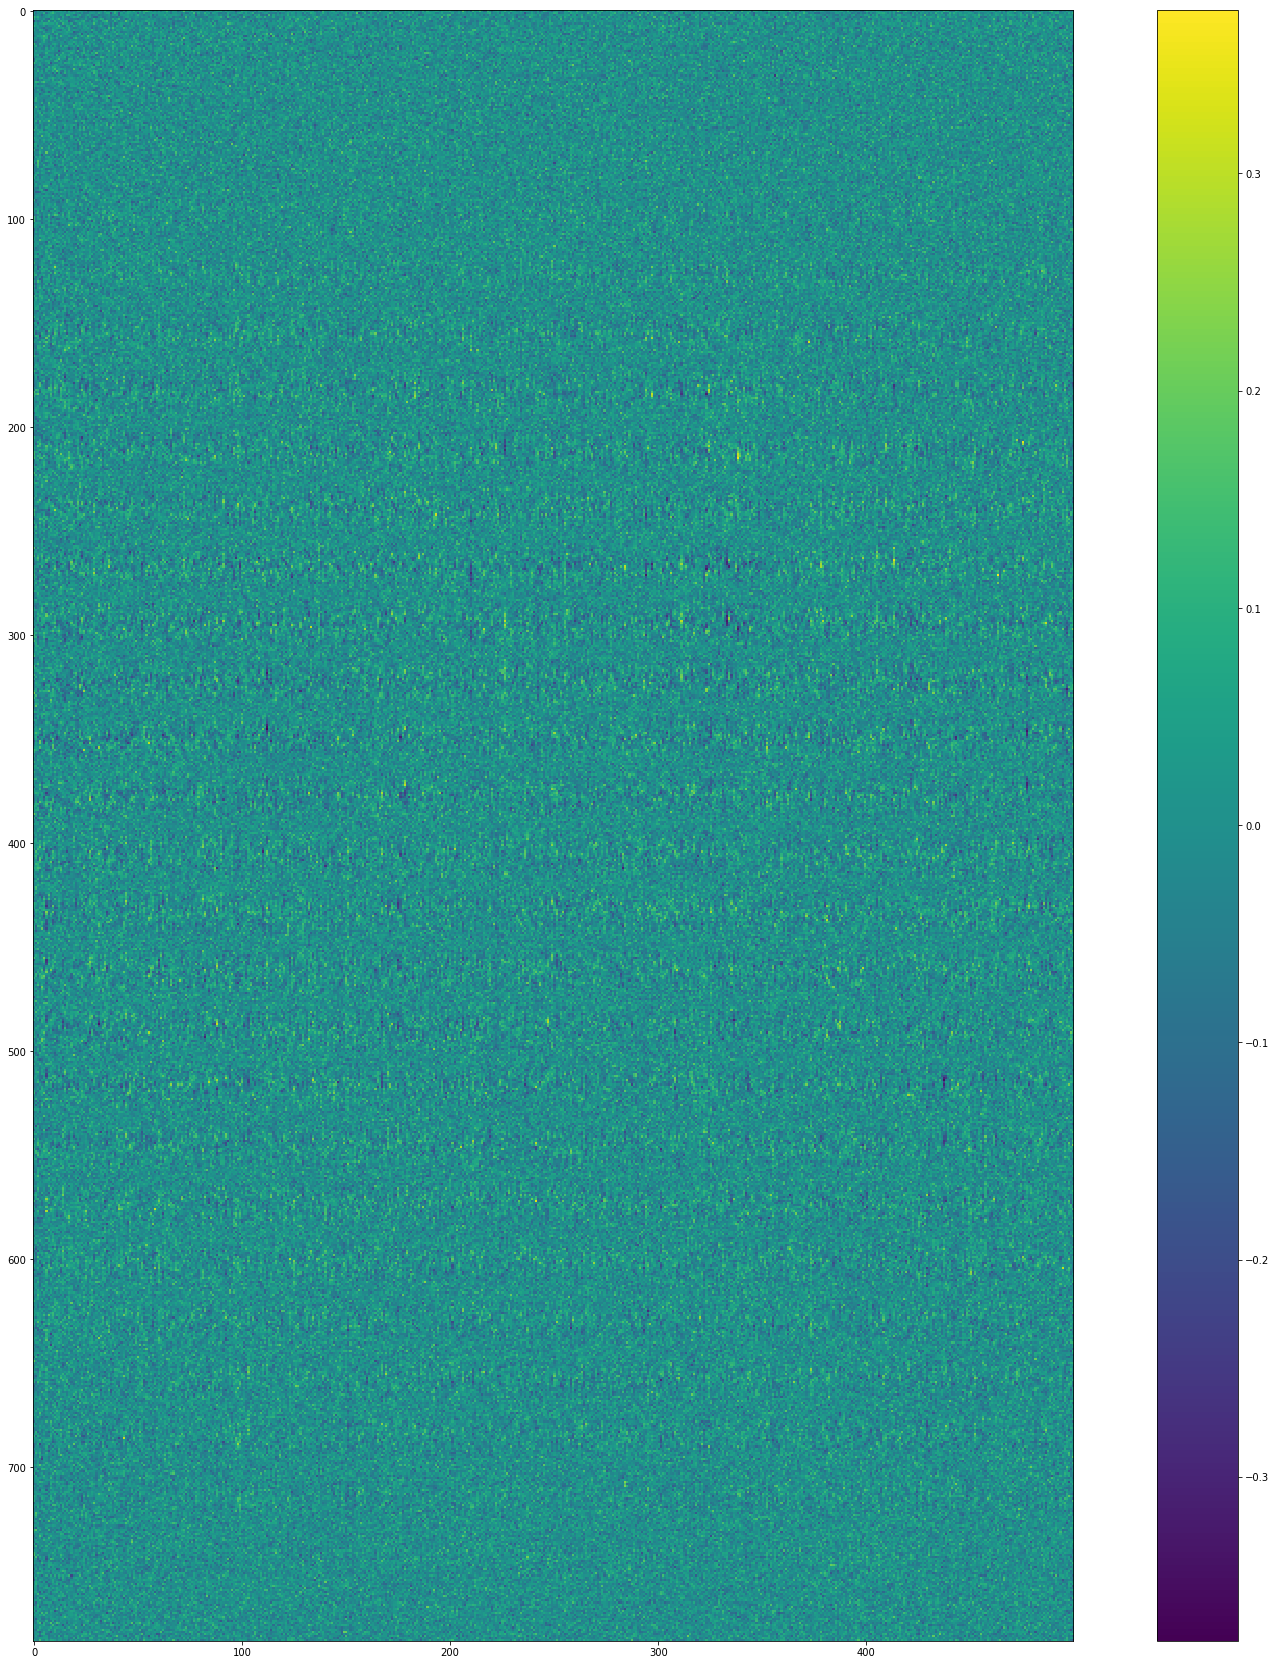

3. Relu(300)


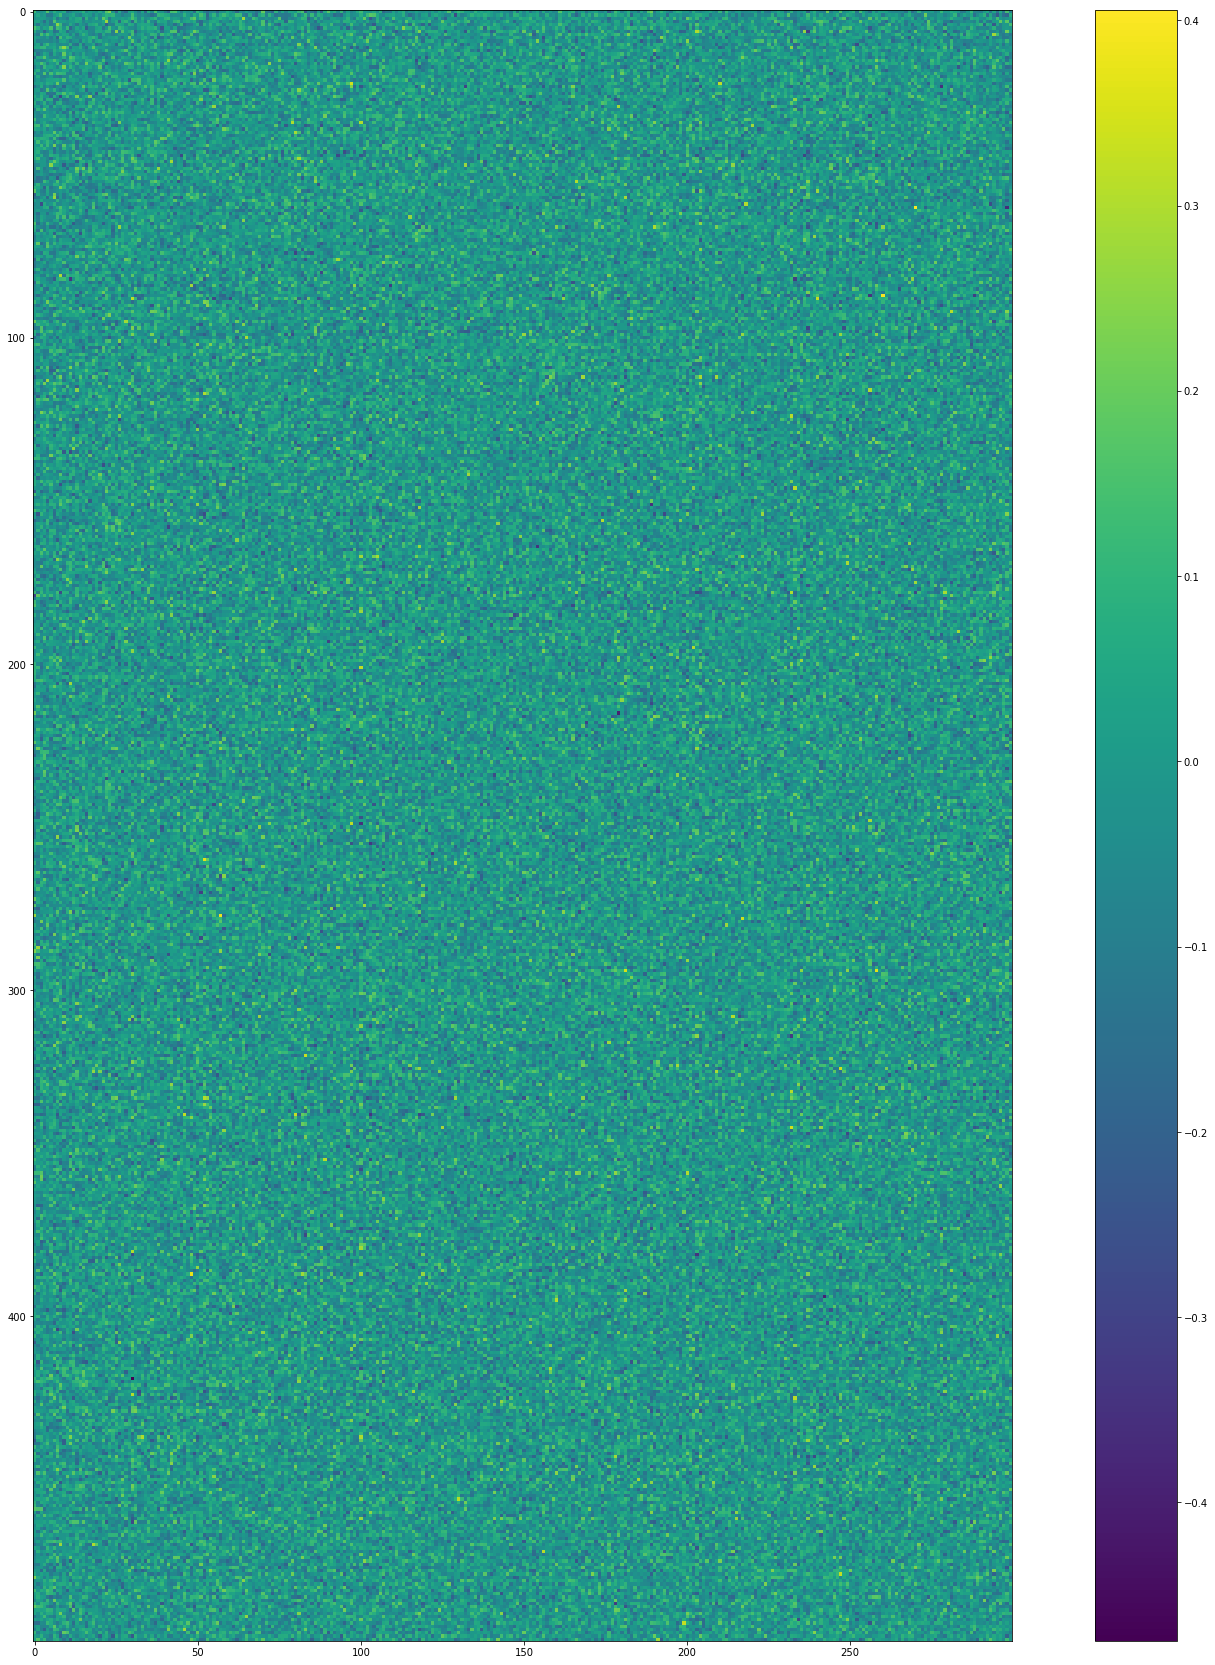

4. Softmax(10)


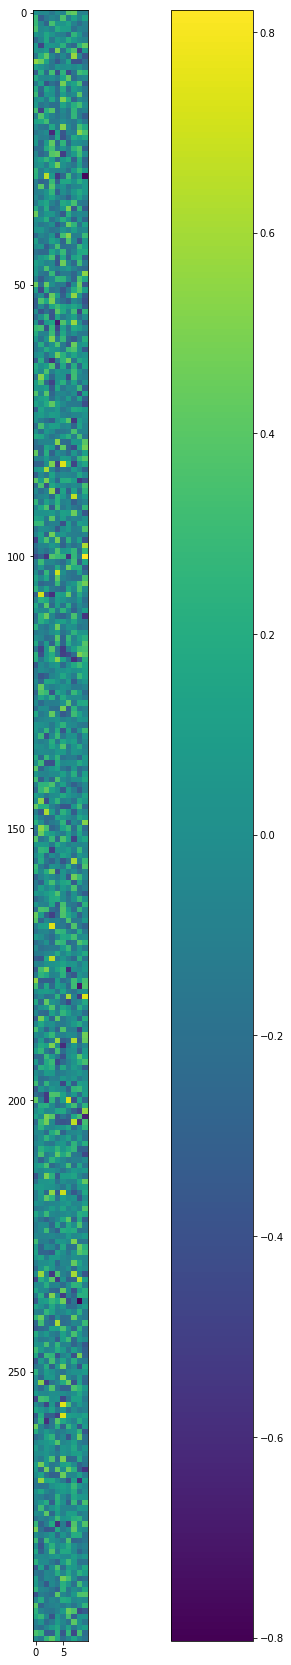

In [107]:
i_ = 0
for lyr in network.layers:
    i_ += 1
    print('{}. {}'.format(i_, lyr))    
    if hasattr(lyr, 'weight'):
        plt.figure(figsize=(30,30))
        plt.imshow(lyr.weight.get_value())
        plt.colorbar()        
        plt.show()
    else:
        print('   No Weight')
            